# Import Libraries and Dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [13]:
diabete = pd.read_csv(r"C:\Users\ADMIN\Downloads\diabetes_binary_health_indicators_BRFSS2015.csv\diabetes_binary_health_indicators_BRFSS2015.csv")


# Description of Dataset

In [14]:
diabete.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [15]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

It can be clearly see that there isnt any values in a wrong type

# EDA

<Axes: >

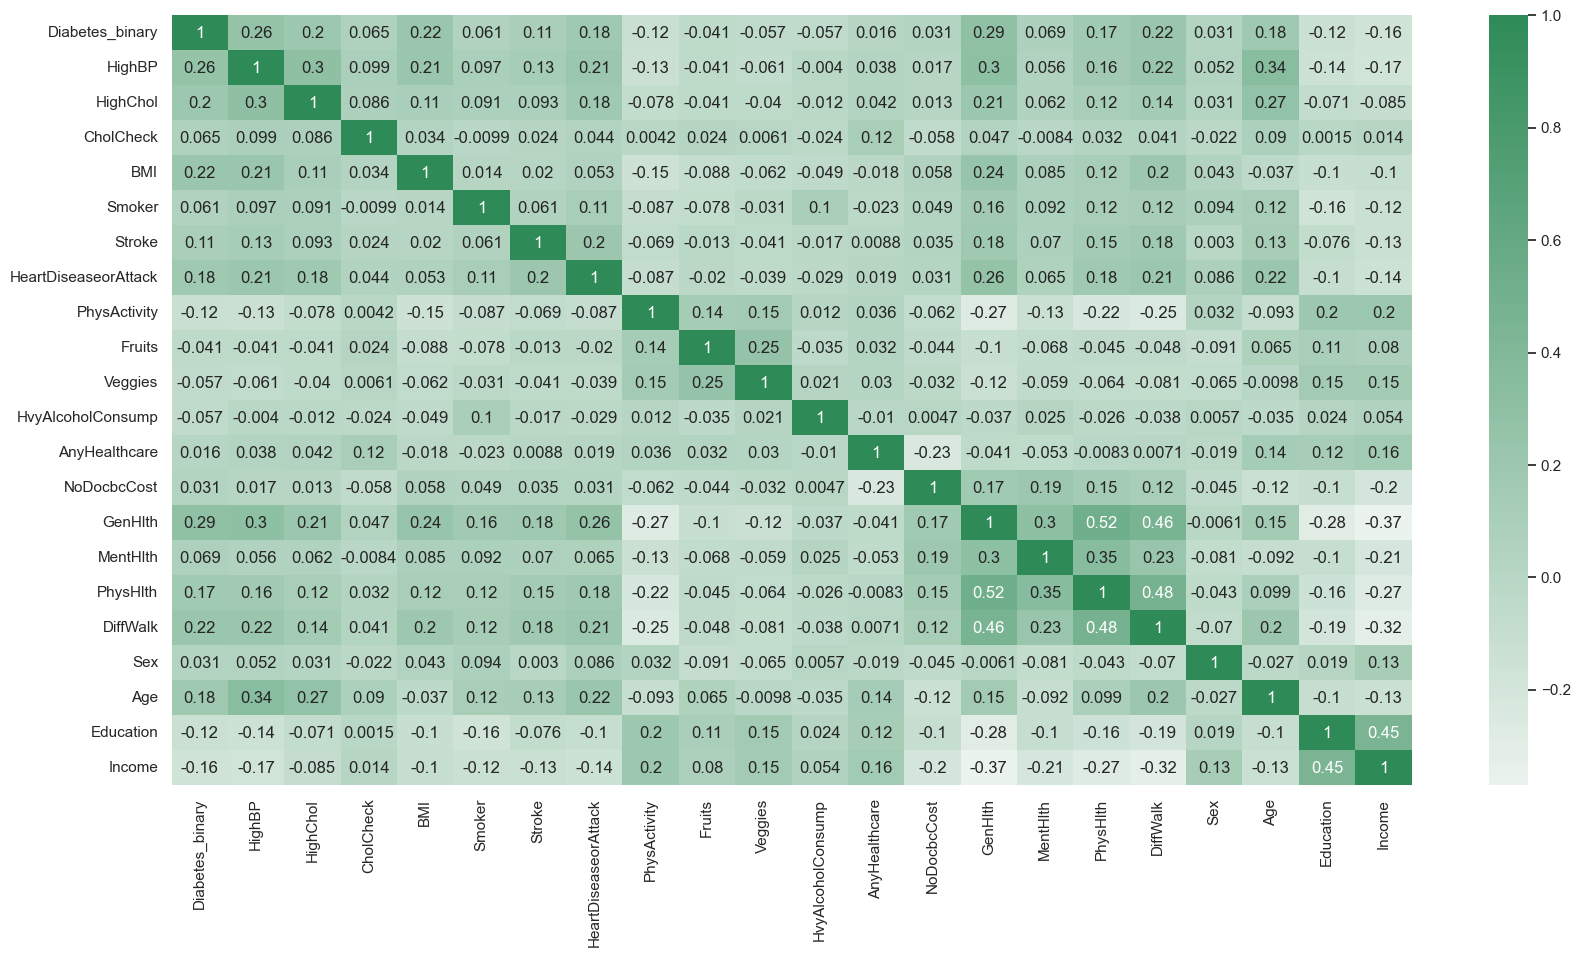

In [16]:
#Plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(diabete.corr(),annot=True , cmap =(sns.light_palette("seagreen", as_cmap=True)) )

Key findings:  

- Mental Health and Physical Health strongly correlates to eachother, where if one worsen can lead to the other falling in response.  
- Individuals with higher income tends to report better general health.  
- Age correlates positively with Stroke, High Blood Pressure, and Difficulty Walking.  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7592\4172615594.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diabete, x="Diabetes_binary", palette="Set2")


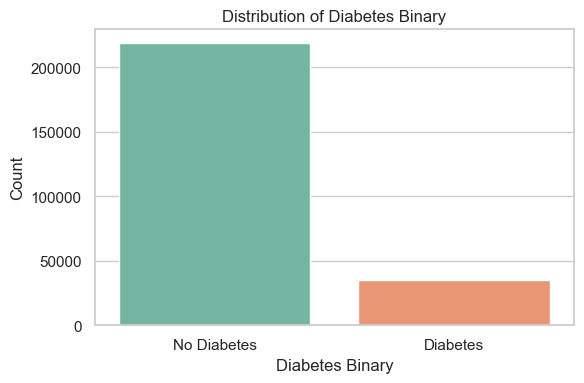

In [17]:
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=diabete, x="Diabetes_binary", palette="Set2")
plt.title("Distribution of Diabetes Binary")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel("Count")
plt.xlabel("Diabetes Binary")
plt.tight_layout()
plt.show()

A majority of the individuals does not have diabetes (labeled 0), while a smaller portion of the population have diabetes or pre-diabetes (labeled 1).

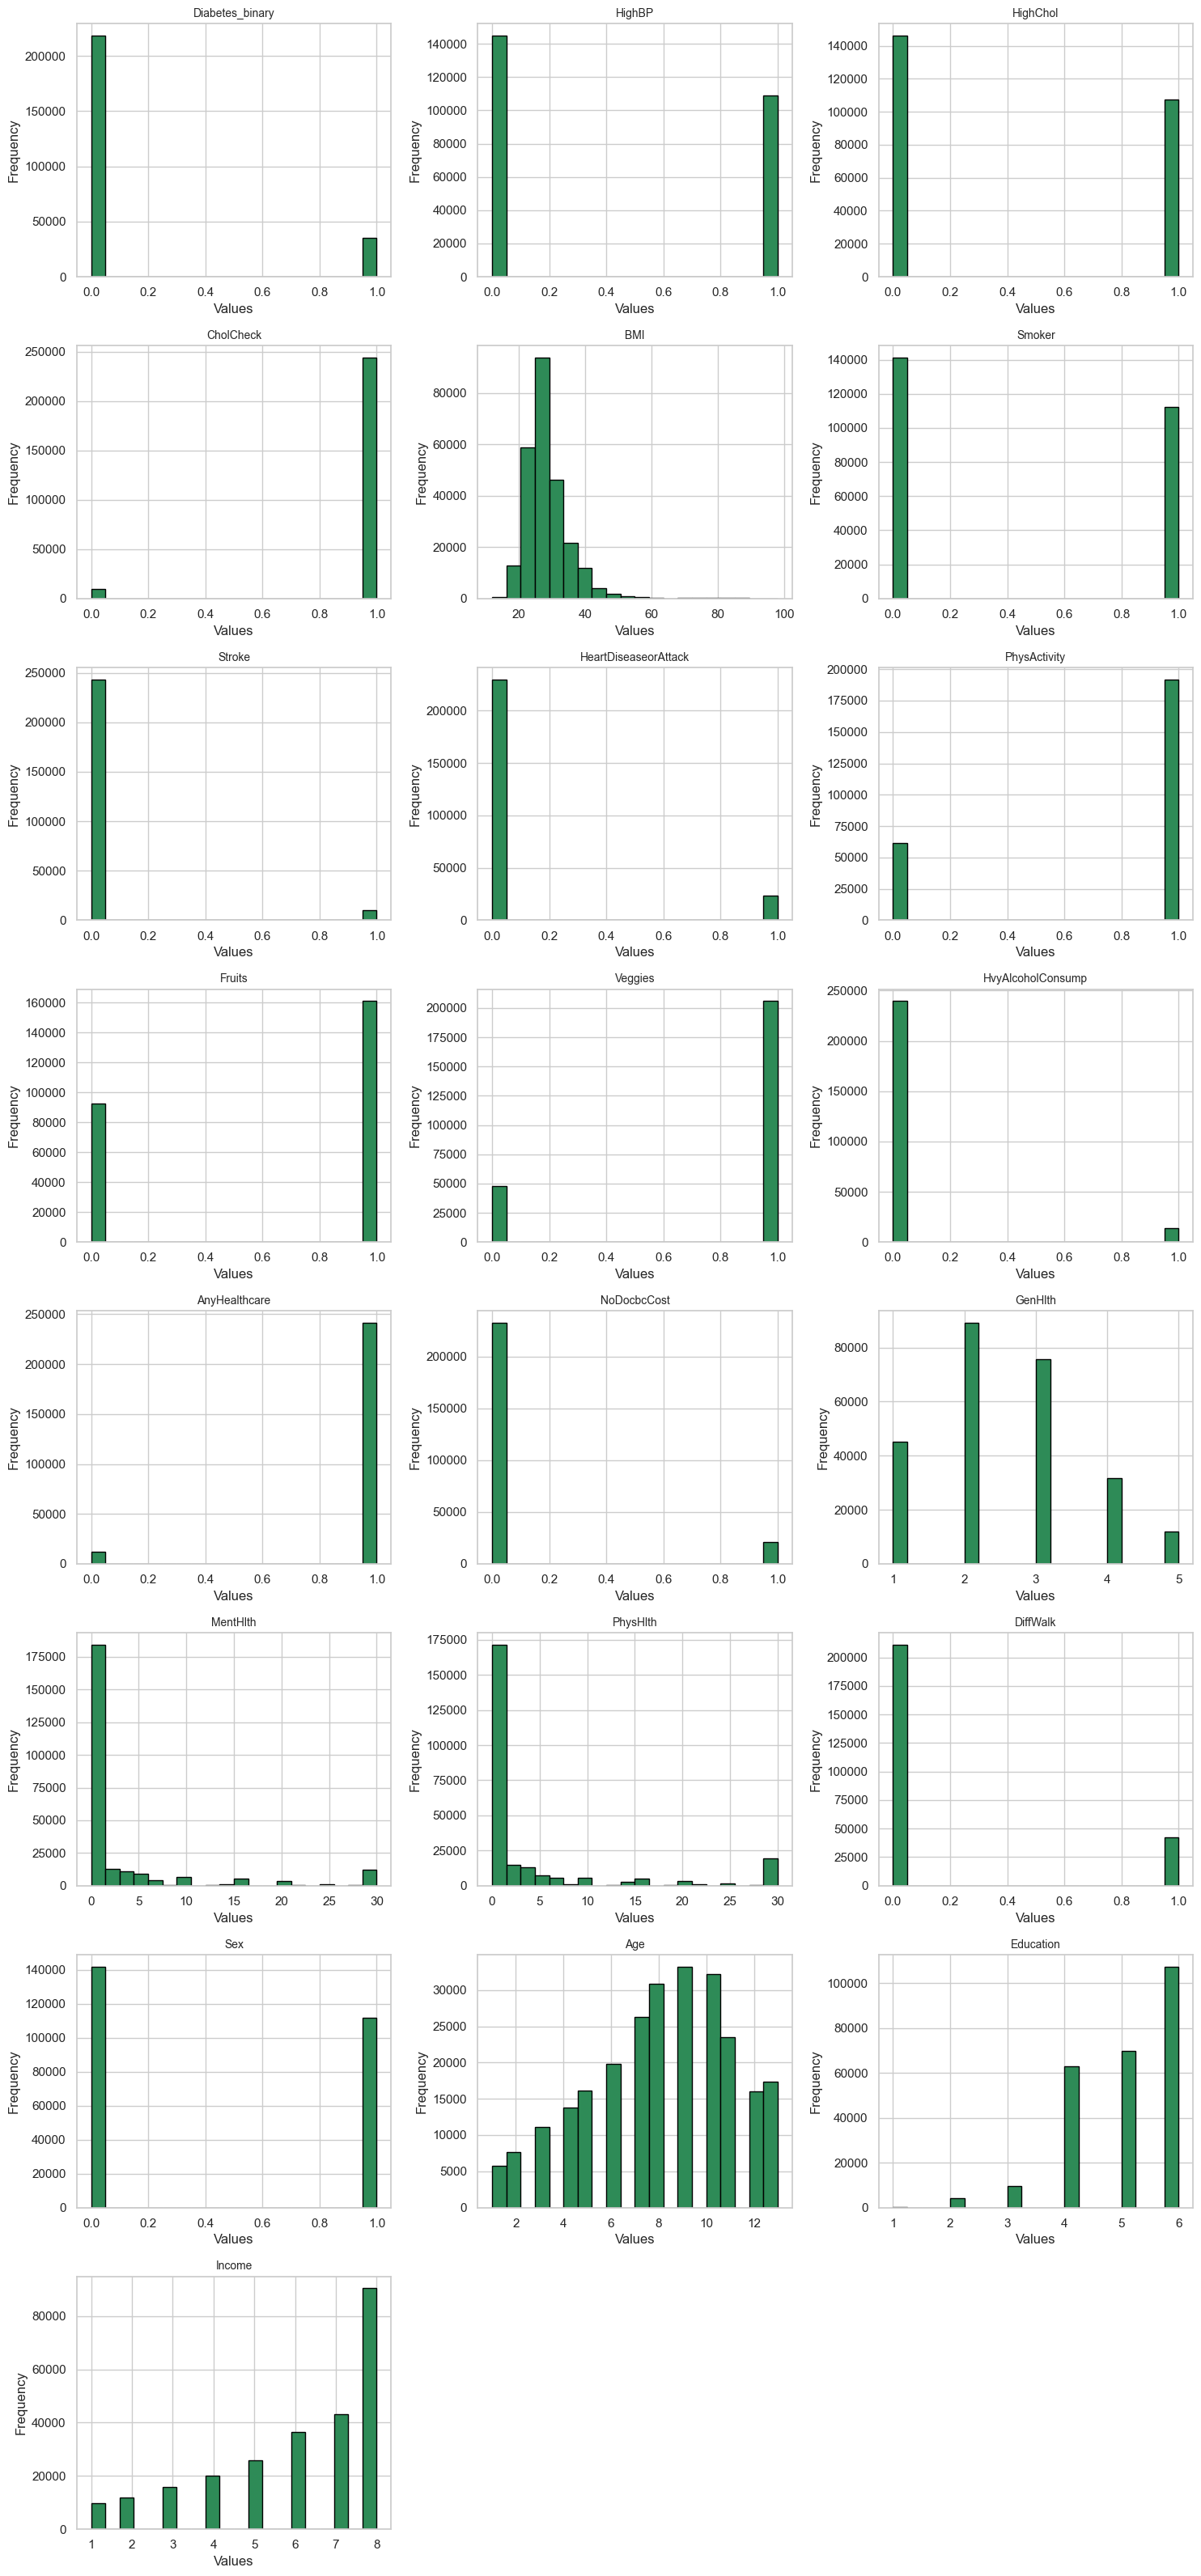

In [18]:
num_columns = len(diabete.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # 3 columns per row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))


axes = axes.flatten()

#histogram for column
for i, col in enumerate(diabete.columns):
    axes[i].hist(diabete[col], bins=20, color='seagreen', edgecolor='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

#Remove extra subplots if columns are fewer than grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Based on the distribution in DiffWalk, GenHlth, MentHlth, most cases are relatively healthy, despite half of them are smokers and a third don't do any physical activity.  
- Most cases are well Educated and have a fairly distributed income (almost).  

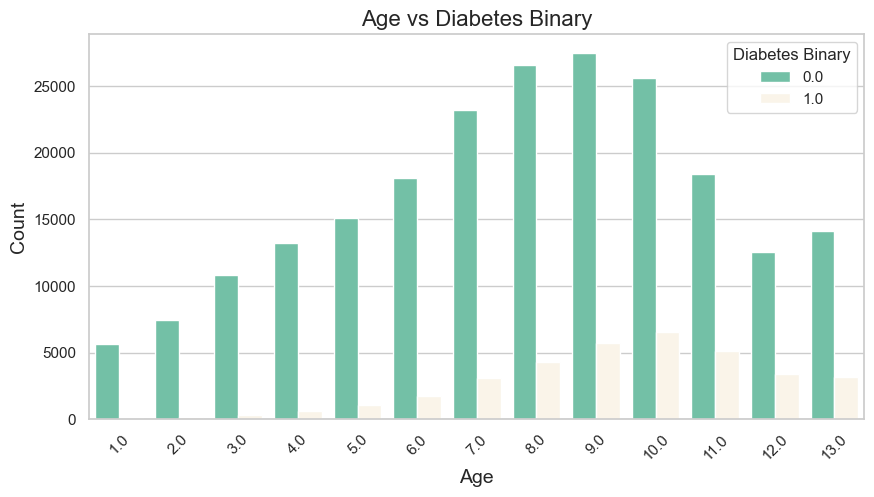

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Age', hue='Diabetes_binary', data=diabete, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title('Age vs Diabetes Binary', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Diabetes Binary')
plt.show()

People aged 50 and above are most proned to diabetes.  

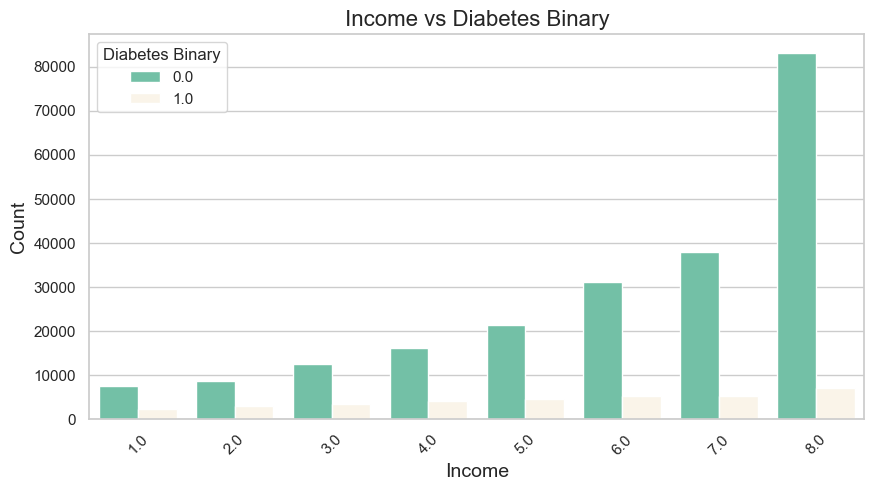

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Income', hue='Diabetes_binary', data=diabete, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title('Income vs Diabetes Binary', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Diabetes Binary')
plt.show()

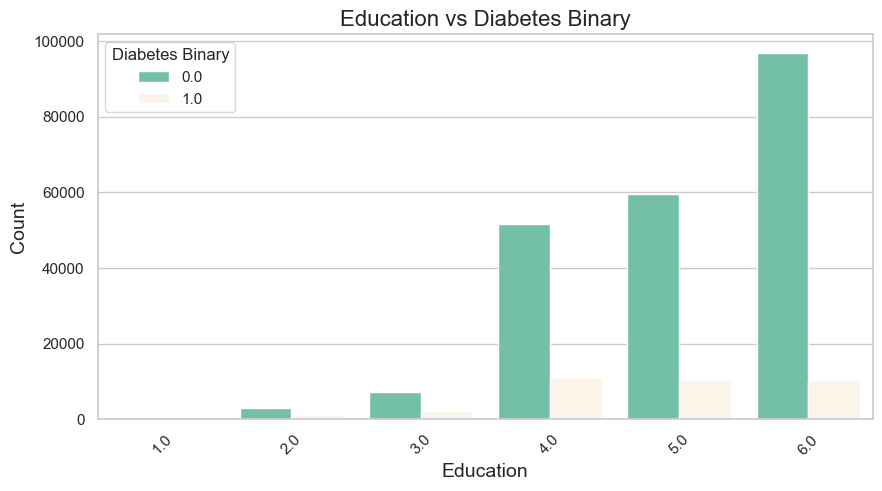

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x= "Education", hue="Diabetes_binary", data=diabete, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title("Education vs Diabetes Binary", fontsize=16)
plt.xlabel("Education", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Diabetes Binary')
plt.show()

The higher the Income and Education level, the better the population's health become, even though they have very little to do with being diabetic.  

In [22]:
# Function to separate binary columns and other columns
def separate_binary_columns(df):
    binary_cols = []
    other_cols = []
    
    for col in df.columns:
        unique_vals = df[col].dropna().unique()  # Ignore NaNs
        if set(unique_vals).issubset({0, 1}):
            binary_cols.append(col)
        else:
            other_cols.append(col)
    
    return binary_cols, other_cols

binary_cols, other_cols = separate_binary_columns(diabete)
print(binary_cols)
print(other_cols)

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


In [23]:
# Function to plot the concurence of each value in each column
def plot_value_counts_per_column(df):
    for i, col in enumerate(df.columns):
        value_counts = df[col].value_counts(dropna=False).sort_index()
        value_counts.plot(kind='bar')
        plt.title(f'Value Counts: {col}')
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


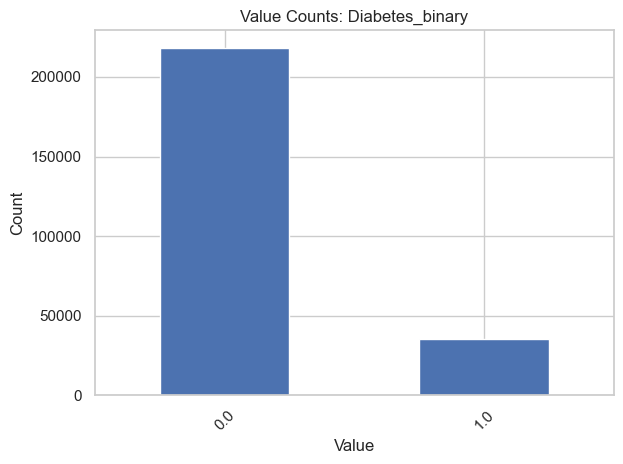

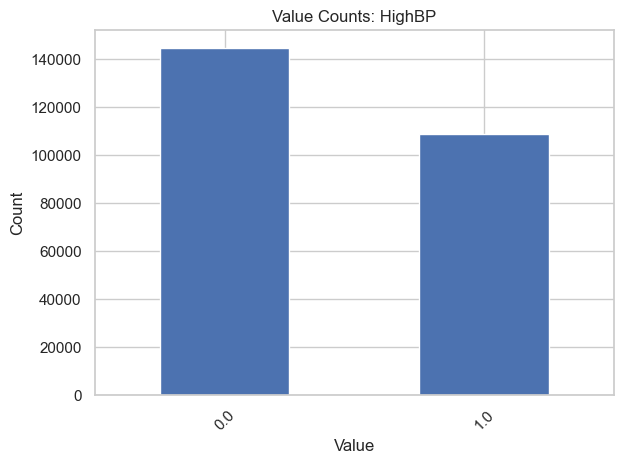

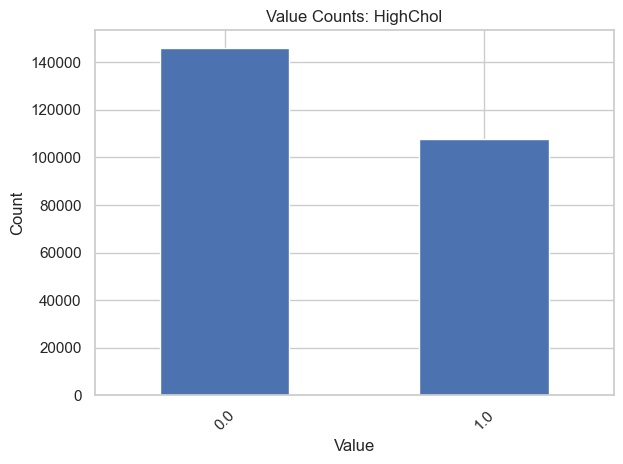

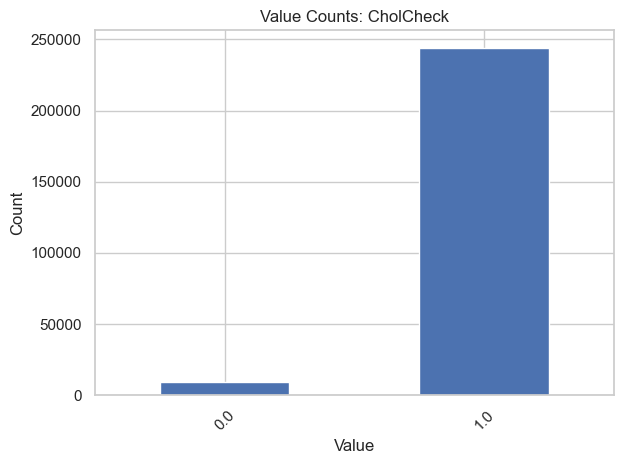

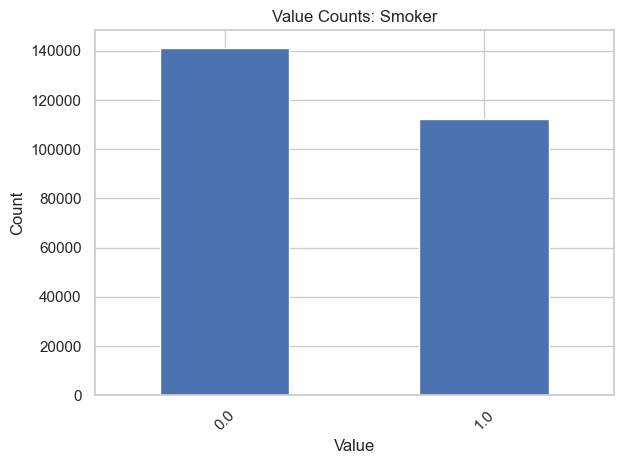

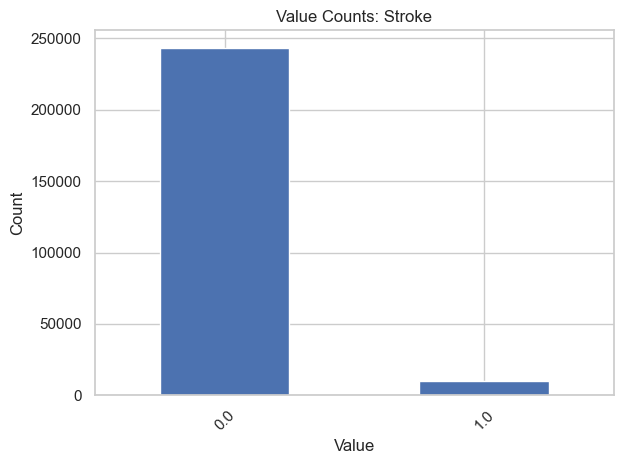

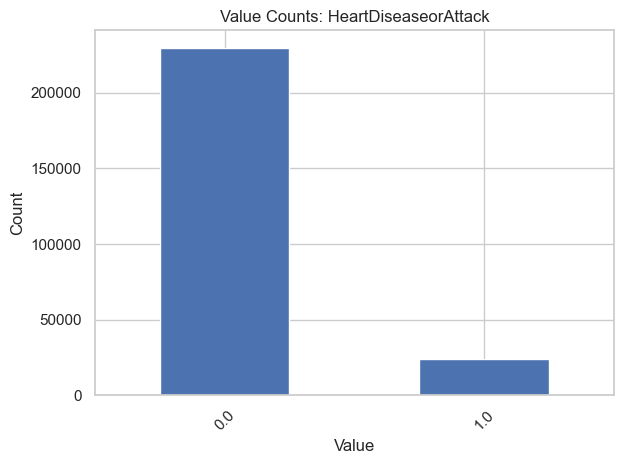

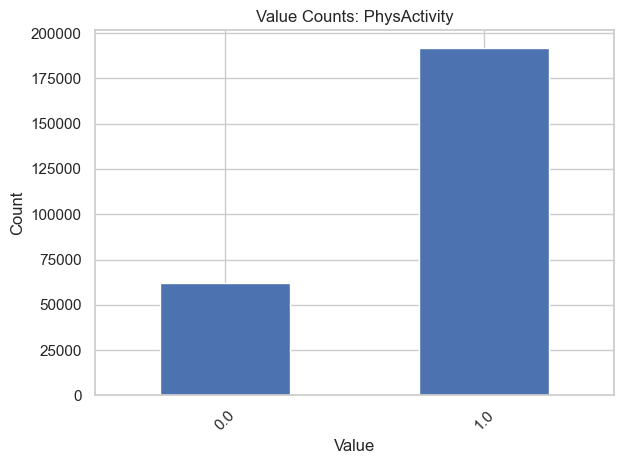

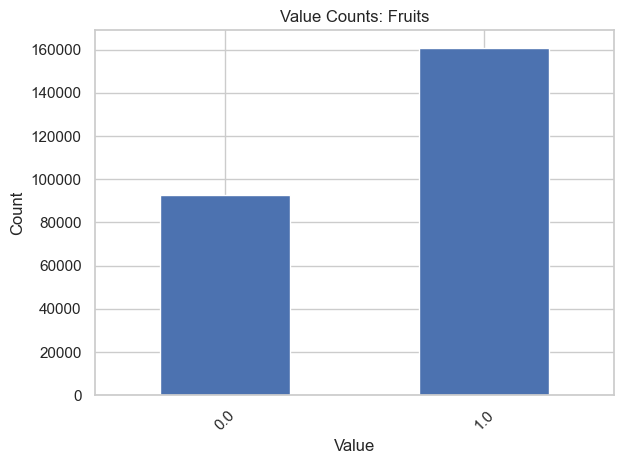

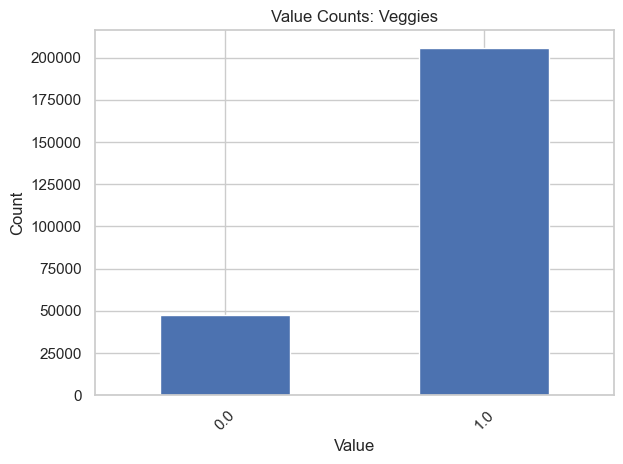

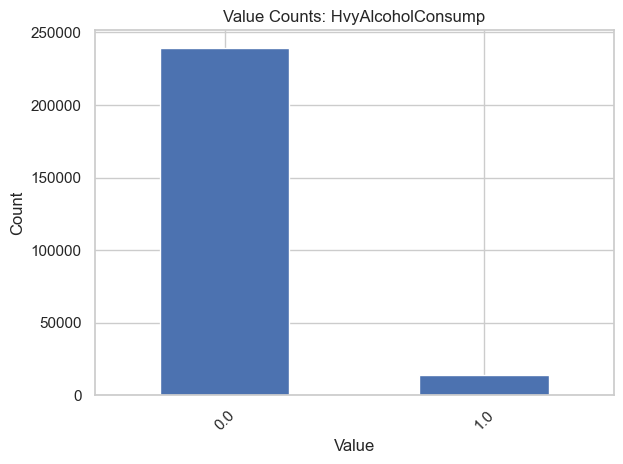

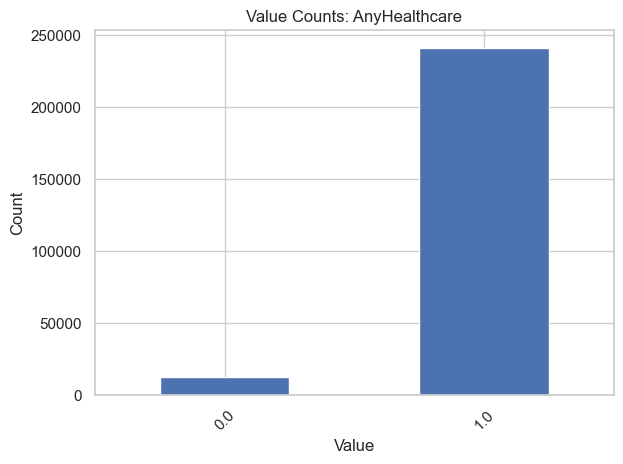

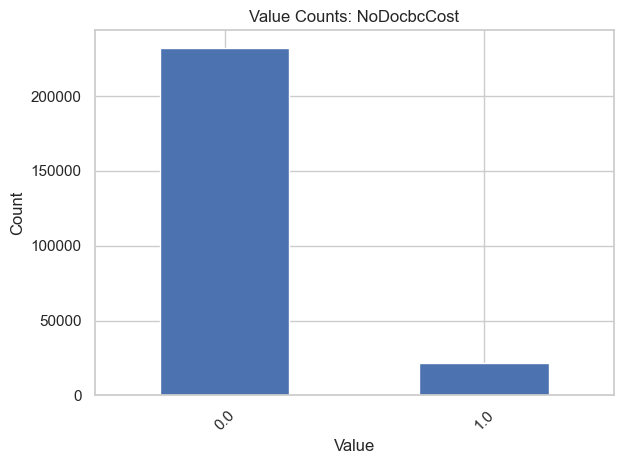

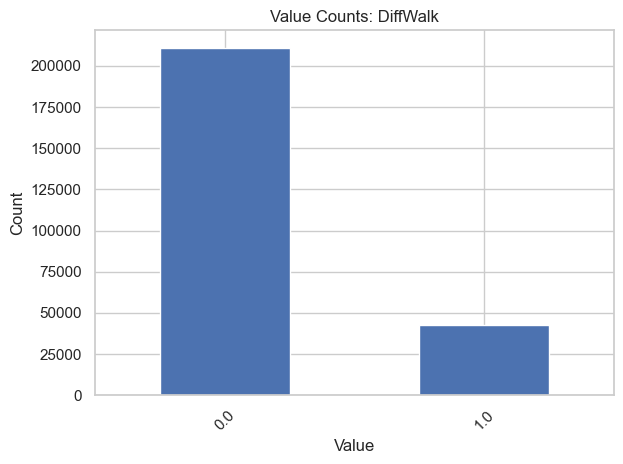

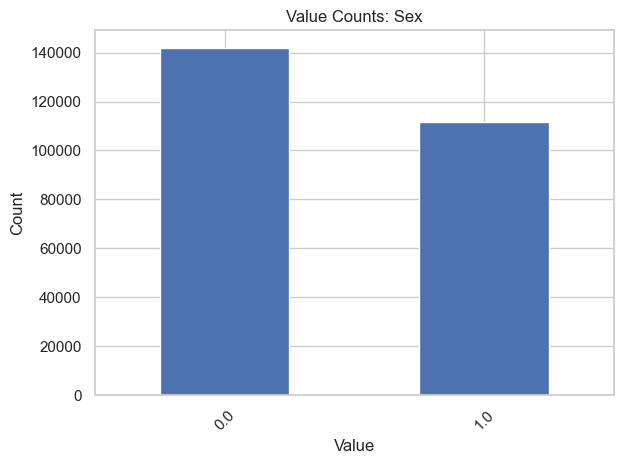

In [24]:
# PLot columns with binary values
plot_value_counts_per_column(diabete[binary_cols])

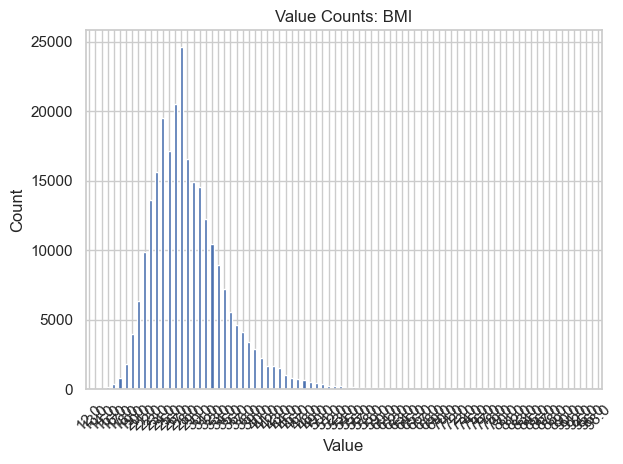

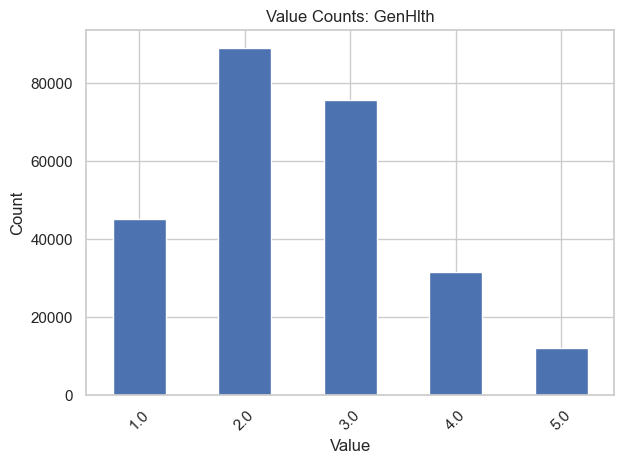

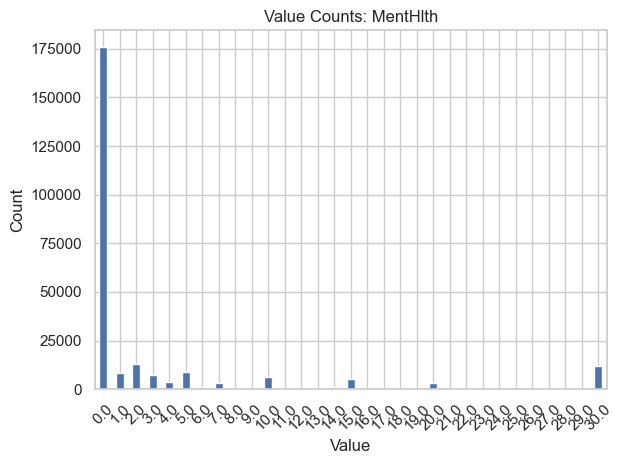

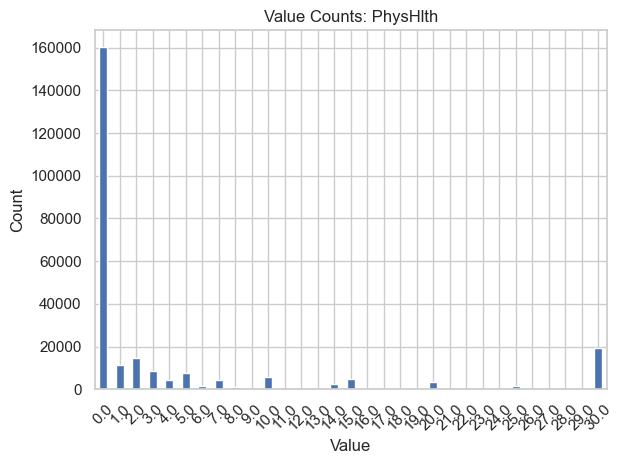

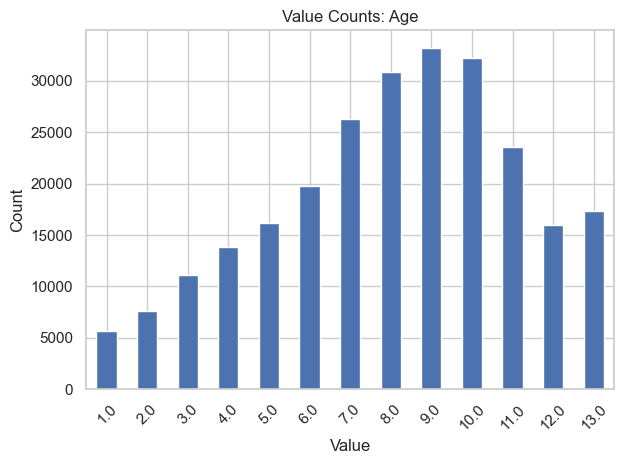

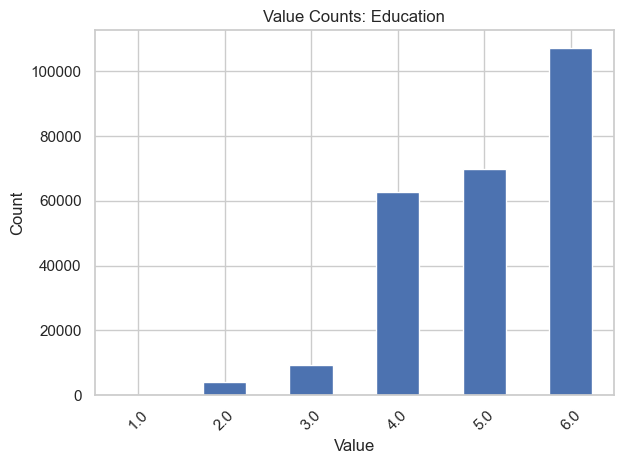

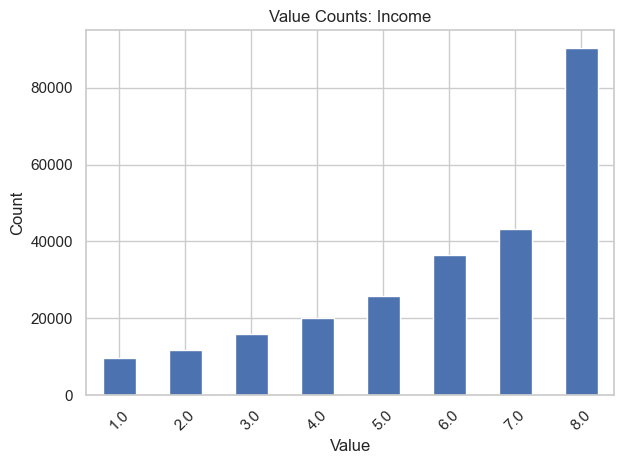

In [25]:
# PLot columns with non-binary values
plot_value_counts_per_column(diabete[other_cols]) 

From what i can see, there are a lot of outliers in columns BMI, PhysHlth, MenHlth. From this moment, we approach this problem with our most common method, which is clipping

In [26]:
corr_matrix = diabete.corr(numeric_only=True)
target_corr = corr_matrix['Diabetes_binary'].drop(labels=['Diabetes_binary'])
sorted_corr = target_corr.sort_values()
print(f"\n🔻 Top {5} Negative Correlations with diabetes:")
print(sorted_corr.head(5))
print(f"\n🔺 Top {5} Positive Correlations with diabetes:")
print(sorted_corr.tail(5)[::-1])


🔻 Top 5 Negative Correlations with diabetes:
Income              -0.163919
Education           -0.124456
PhysActivity        -0.118133
HvyAlcoholConsump   -0.057056
Veggies             -0.056584
Name: Diabetes_binary, dtype: float64

🔺 Top 5 Positive Correlations with diabetes:
GenHlth     0.293569
HighBP      0.263129
DiffWalk    0.218344
BMI         0.216843
HighChol    0.200276
Name: Diabetes_binary, dtype: float64


# Data Preprocessing

In [27]:
# Clipping Outliers Function
def clip_outliers(data, columns=None, factor=1.5):
    """
    Clips outliers in a DataFrame or Series using the IQR method.
    
    Parameters:
        data (pd.DataFrame or pd.Series): The data to process.
        columns (list): List of column names to clip (only for DataFrame). If None, all numeric columns are used.
        factor (float): The multiplier for the IQR to define outliers.

    Returns:
        pd.DataFrame or pd.Series: Data with outliers clipped.
    """
    if isinstance(data, pd.Series):
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - factor * iqr
        upper_bound = q3 + factor * iqr
        return data.clip(lower=lower_bound, upper=upper_bound)

    elif isinstance(data, pd.DataFrame):
        result = data.copy()
        if columns is None:
            columns = result.select_dtypes(include=[np.number]).columns
        for col in columns:
            q1 = result[col].quantile(0.25)
            q3 = result[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - factor * iqr
            upper_bound = q3 + factor * iqr
            result[col] = result[col].clip(lower=lower_bound, upper=upper_bound)
        return result
    else:
        raise TypeError("Input must be a pandas DataFrame or Series")


In [28]:
# Detect Missing Values Function
def detect_missing_values(df):
    """
    Detects missing values in a DataFrame and returns a summary.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: Summary of missing values (count and percentage).
    """
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing %': missing_percent
    })
    return missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)


In [29]:
# Detect Duplicates
def detect_duplicates(df, subset=None, keep='first'):
    """
    Detects duplicate rows in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        subset (list or str, optional): Column(s) to consider for identifying duplicates. If None, use all columns.
        keep (str): Determines which duplicates to mark as False.
                    Options: 'first', 'last', False (mark all as duplicates)

    Returns:
        pd.DataFrame: DataFrame with only duplicate rows.
    """
    duplicates = df[df.duplicated(subset=subset, keep=keep)]
    return duplicates


From what i can see, there are a lot of outliers in columns BMI, PhysHlth, MentHlth. From this moment, we approach this problem with our most common method, which is clipping

## Duplicates Detection

In [30]:
detect_duplicates(diabete)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


There are a lot of duplicates in the whole dataset

In [31]:
diabete = diabete.drop_duplicates(keep = 'first')

## Missing Values Detection

In [32]:
X = diabete.drop('Diabetes_binary', axis = 1)
y = diabete['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [33]:
print(detect_missing_values(X_train))
print(detect_missing_values(X_test))
# There isnt any missing value

Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


## Outliers Removal

In [34]:
X_train[['BMI', 'PhysHlth', 'MentHlth']] = clip_outliers(X_train[['BMI', 'PhysHlth', 'MentHlth']])
X_test[['BMI', 'PhysHlth', 'MentHlth']] = clip_outliers(X_test[['BMI', 'PhysHlth', 'MentHlth']])
                                                        

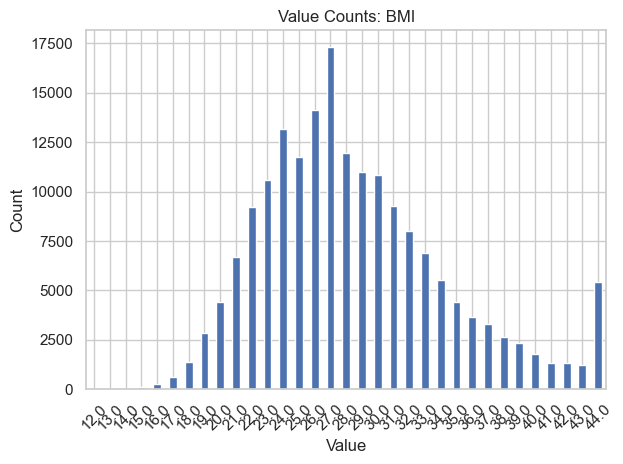

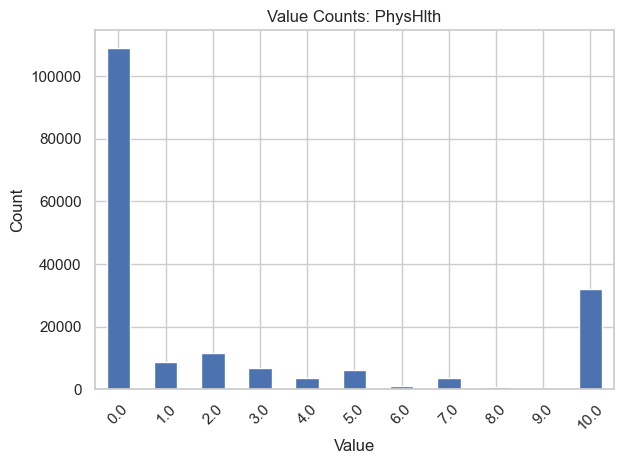

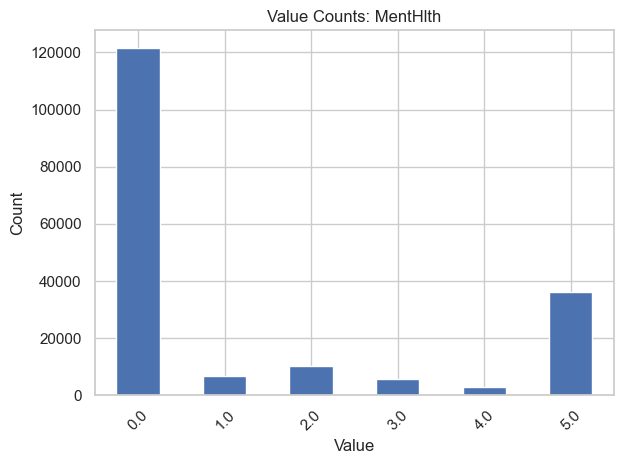

In [35]:
plot_value_counts_per_column(X_train[['BMI', 'PhysHlth', 'MentHlth']]) 

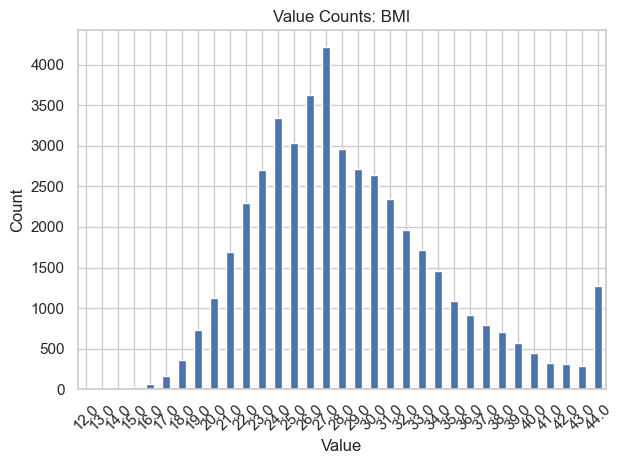

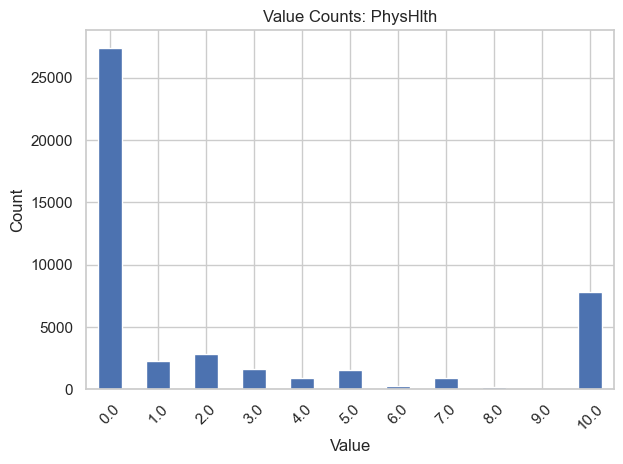

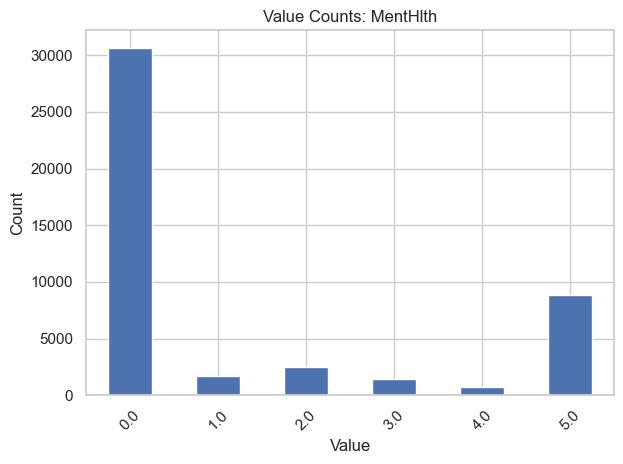

In [36]:
plot_value_counts_per_column(X_test[['BMI', 'PhysHlth', 'MentHlth']]) 